#GRADIENT DESCENT  FIRST METHOD

In [46]:
import numpy as np
import matplotlib.pyplot as plt

data1 = np.array([[ 10.63415642, -10.31804897,  -3.91323692,  13.47455445,
         12.00245098,   7.01459213, -11.5083141 ,   7.83875   ,
        -11.21021617,   6.95282804,   7.79101979,  13.94835343,
          3.01243432,  11.67679791,  13.41197807,  14.61995534,
         -8.70743264, -14.10312612, -11.68244994,  14.75202699,
          9.25316629,  -4.82661632,  -6.99915042,   6.49562369,
        -11.46126563,  -9.38897405,  -3.68953244,  -5.95603391,
        -10.80285714, -11.78004227],
       [  1.        ,   0.        ,   0.        ,   1.        ,
          1.        ,   1.        ,   0.        ,   1.        ,
          0.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          0.        ,   0.        ,   0.        ,   1.        ,
          1.        ,   0.        ,   0.        ,   1.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ]])




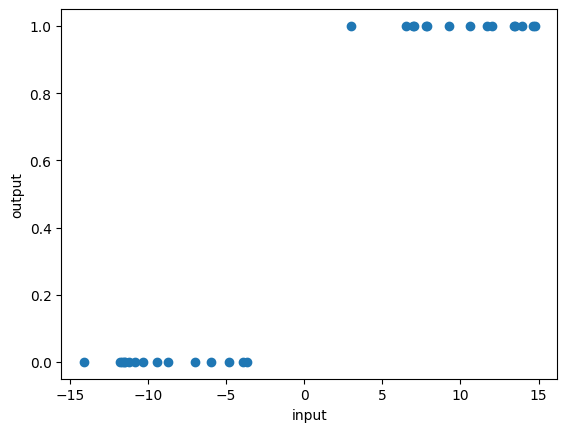

In [49]:
data1_input = data1[0]
data1_output = data1[1]

plt.scatter(data1_input, data1_output)
plt.xlabel("input")
plt.ylabel("output")
plt.show()

Δίνεται το ακόλουθο σύνολο δεδομένων το οποίο καλείστε να χρησιμοποιήσετε για να μάθετε (εκτιμήσετε) την πραγματική απεικόνιση μεταξύ δεδομένων εισόδου και στόχου.

Θεωρήστε τον χώρο υποθέσεων που αποτελείται από τις ακόλουθες πραγματικές συναρτήσεις $f_1:\mathbb{R}\to\mathbb{R}$ με δύο παραμέτρους $w=[w_0, w_1]^\intercal\in\mathbb{R}^2$ :

$$
	f_1(x;w) = \frac{1}{1+e^{-(w_0+w_1x)}}
$$

Επιπλέον, τη συνάρτηση κόστους $L_1:\mathbb{R}^2\to\R$ η οποία δίνεται ως :

$$
	L_1(w) = -\frac{1}{n} \sum_{i=1}^n \Big( y_i \log_2 f_1(x_i;w) + (1-y_i) \log_2\big( 1 - f_1(x_i;w) \big)	\Big)
$$
όπου με $\{ (x_i,y_i ) \}_{i=1}^n$ συμβολίζονται τα δεδομένα εκπαίδευσης.

In [50]:
print(len(data1_input))
n = len(data1_input)
n = len(data1_output)
n
learning_rate = 0.001
reps = 150
w = np.transpose((np.array([0, 1])))
print(w)

w0 = w[0]  # w0 is the first element of w
w1 = w[1]  # w1 is the second element of w

30
[0 1]


In [51]:
w0 = w[0]  # w0 is the first element of w
w1 = w[1]  # w1 is the second element of w
w0_init = w0
w1_init = w1

In [91]:
def func1(w0, w1, x):
    return 1 / (1 + np.exp(-(w0 + w1 * x)))

def L1(w0, w1, x, y):
    n = len(y)
    f1_values = func1(w0, w1, x)
    return -np.sum(y * np.log(f1_values) / np.log(2) + (1 - y) * np.log(1 - f1_values) / np.log(2)) / n

def gradients(w0, w1, x, y):
    n = len(y)
    f1_values = func1(w0, w1, x)
    error = f1_values - y
    grad_w0 = np.sum(error) / (n*(np.log(2)) )
    grad_w1 = np.sum(error * x) / (n*(np.log(2)) )
    return grad_w0, grad_w1

def gradient_descent(x, y, w0_init, w1_init, learning_rate, reps):
    w0, w1 = w0_init, w1_init
    loss_history = []
    for i in range(reps):
        grad_w0, grad_w1 = gradients(w0, w1, x, y)
        w0 -= learning_rate * grad_w0
        w1 -= learning_rate * grad_w1
        loss = L1(w0, w1, x, y)
        loss_history.append(loss)

        print(f"Iteration {i}, Loss: {loss}")
    return w0, w1, loss_history


In [72]:
learning_rate = 0.001
reps = 150
# ])
x = data1[0]
y = data1[1]

w0, w1,loss_history_1 = gradient_descent(x, y, w0_init, w1_init, learning_rate, reps)
print(f"Optimized weights: w0 = {w0}, w1 = {w1}")

Iteration 0, Loss: 0.005222175651252862
Iteration 1, Loss: 0.00522180252564145
Iteration 2, Loss: 0.005221429457207874
Iteration 3, Loss: 0.005221056445938488
Iteration 4, Loss: 0.0052206834918196885
Iteration 5, Loss: 0.005220310594837934
Iteration 6, Loss: 0.005219937754979545
Iteration 7, Loss: 0.005219564972231108
Iteration 8, Loss: 0.0052191922465788495
Iteration 9, Loss: 0.005218819578009339
Iteration 10, Loss: 0.005218446966508955
Iteration 11, Loss: 0.005218074412064179
Iteration 12, Loss: 0.005217701914661396
Iteration 13, Loss: 0.0052173294742870495
Iteration 14, Loss: 0.005216957090927606
Iteration 15, Loss: 0.0052165847645695524
Iteration 16, Loss: 0.005216212495199324
Iteration 17, Loss: 0.005215840282803345
Iteration 18, Loss: 0.005215468127368174
Iteration 19, Loss: 0.005215096028880183
Iteration 20, Loss: 0.005214723987325909
Iteration 21, Loss: 0.005214352002691819
Iteration 22, Loss: 0.005213980074964412
Iteration 23, Loss: 0.005213608204130124
Iteration 24, Loss: 0.0

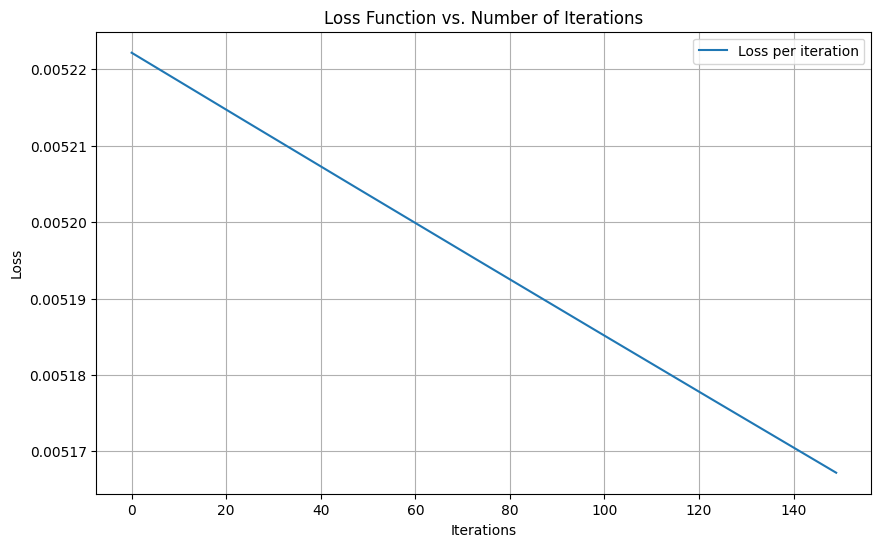

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history_1, label='Loss per iteration')
plt.title('Loss Function vs. Number of Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

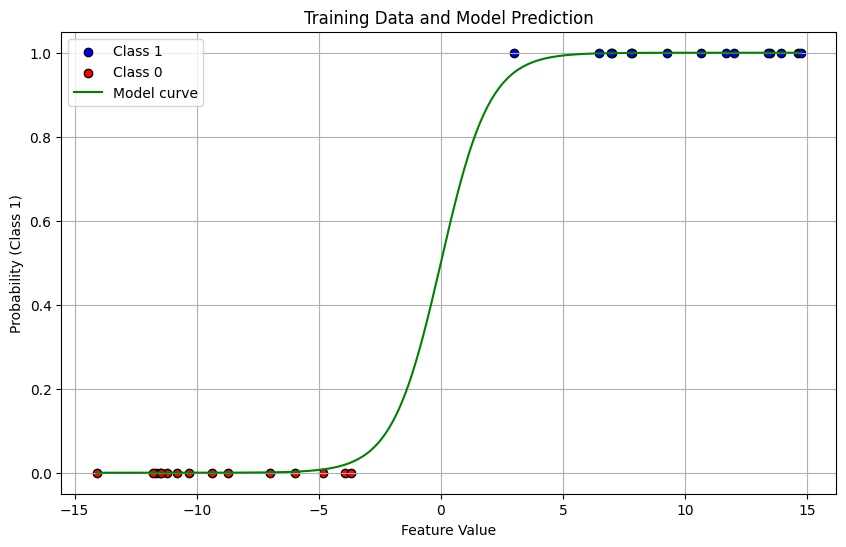

In [87]:

x_values = np.linspace(np.min(x), np.max(x), 300)

y_values = func1(w0, w1, x_values)


plt.figure(figsize=(10, 6))
plt.scatter(x[y == 1], y[y == 1], c='blue', label='Class 1', edgecolors='k')
plt.scatter(x[y == 0], y[y == 0], c='red', label='Class 0', edgecolors='k')
plt.plot(x_values, y_values, label='Model curve', color='green')
plt.title('Training Data and Model Prediction')
plt.xlabel('Feature Value')
plt.ylabel('Probability (Class 1)')
plt.legend()
plt.grid(True)
plt.show()

Iteration 0, Loss: 0.005222511514488424
Iteration 1, Loss: 0.005222474195493183
Iteration 2, Loss: 0.005222436877069901
Iteration 3, Loss: 0.0052223995592186245
Iteration 4, Loss: 0.005222362241939213
Iteration 5, Loss: 0.005222324925231797
Iteration 6, Loss: 0.005222287609096283
Iteration 7, Loss: 0.005222250293532678
Iteration 8, Loss: 0.005222212978540958
Iteration 9, Loss: 0.005222175664121125
Iteration 10, Loss: 0.005222138350273143
Iteration 11, Loss: 0.005222101036997061
Iteration 12, Loss: 0.005222063724292711
Iteration 13, Loss: 0.005222026412160284
Iteration 14, Loss: 0.0052219891005996
Iteration 15, Loss: 0.005221951789610748
Iteration 16, Loss: 0.005221914479193653
Iteration 17, Loss: 0.00522187716934835
Iteration 18, Loss: 0.005221839860074811
Iteration 19, Loss: 0.005221802551372976
Iteration 20, Loss: 0.005221765243242884
Iteration 21, Loss: 0.005221727935684515
Iteration 22, Loss: 0.005221690628697811
Iteration 23, Loss: 0.0052216533222828486
Iteration 24, Loss: 0.00522

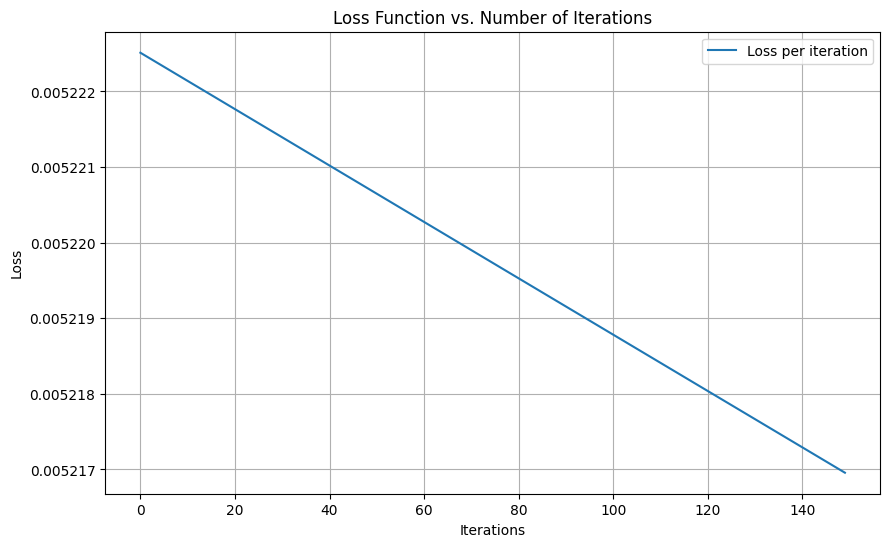

In [93]:
learning_rate = 0.0001
reps = 150


w0, w1,loss_history_2 = gradient_descent(x, y, w0_init, w1_init, learning_rate, reps)
print(f"Optimized weights: w0 = {w0}, w1 = {w1}")
plt.figure(figsize=(10, 6))
plt.plot(loss_history_2, label='Loss per iteration')
plt.title('Loss Function vs. Number of Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

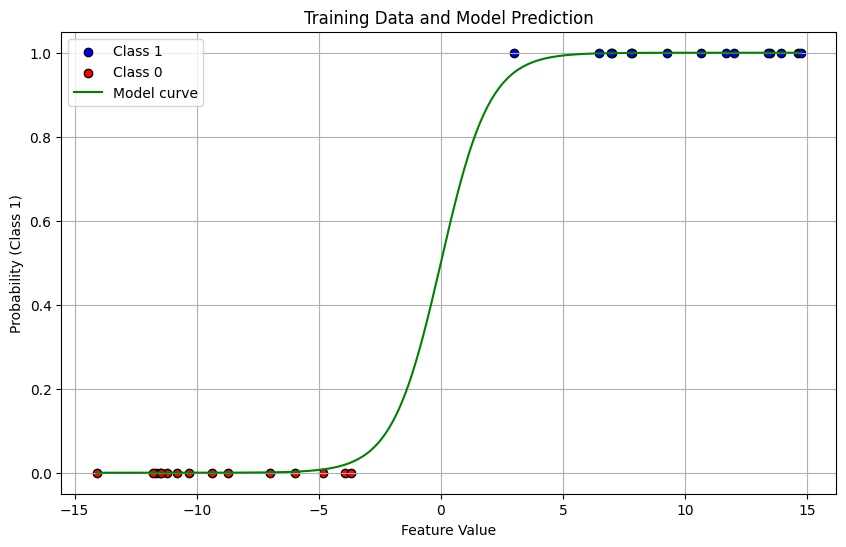

In [86]:
x_values = np.linspace(np.min(x), np.max(x), 300)

y_values = func1(w0, w1, x_values)


plt.figure(figsize=(10, 6))
plt.scatter(x[y == 1], y[y == 1], c='blue', label='Class 1', edgecolors='k')
plt.scatter(x[y == 0], y[y == 0], c='red', label='Class 0', edgecolors='k')
plt.plot(x_values, y_values, label='Model curve', color='green')
plt.title('Training Data and Model Prediction')
plt.xlabel('Feature Value')
plt.ylabel('Probability (Class 1)')
plt.legend()
plt.grid(True)
plt.show()

Στην περίπτωση που ο βαθμός εκμάθησης είναι 0.0001 επειδή έχουμε λίγες επαναλήψεις δεν προλαβαίνει να φτάσει σε τόσο χαμηλό loss όσο στο 0.001 αλλά η διαφορά είναι μικρή σχετικά.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [94]:
def gradient_descent(x, y, w0_init, w1_init, learning_rate, reps):
    w0, w1 = w0_init, w1_init
    loss_history = []
    for i in range(reps):
        if i >= 100 and i <=139:
          learning_rate = 5*0.0001
        if i > 139:
          learning_rate = 0.0001
        grad_w0, grad_w1 = gradients(w0, w1, x, y)
        w0 -= learning_rate * grad_w0
        w1 -= learning_rate * grad_w1
        loss = L1(w0, w1, x, y)
        loss_history.append(loss)
    return w0, w1, loss_history


x = data1[0]
y = data1[1]


# w0_init = 0.0
# w1_init = 0.0
learning_rate = 0.001
reps = 150

w0, w1,loss_history_3 = gradient_descent(x, y, w0_init, w1_init, learning_rate, reps)
print(f"Optimized weights: w0 = {w0}, w1 = {w1}")

Optimized weights: w0 = -2.625319940012817e-05, w1 = 1.0023266801344346


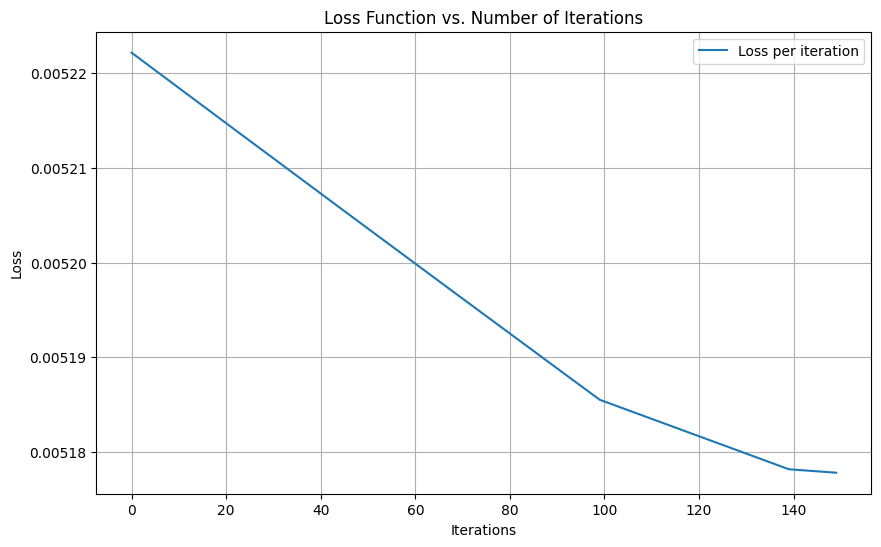

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history_3, label='Loss per iteration')
plt.title('Loss Function vs. Number of Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

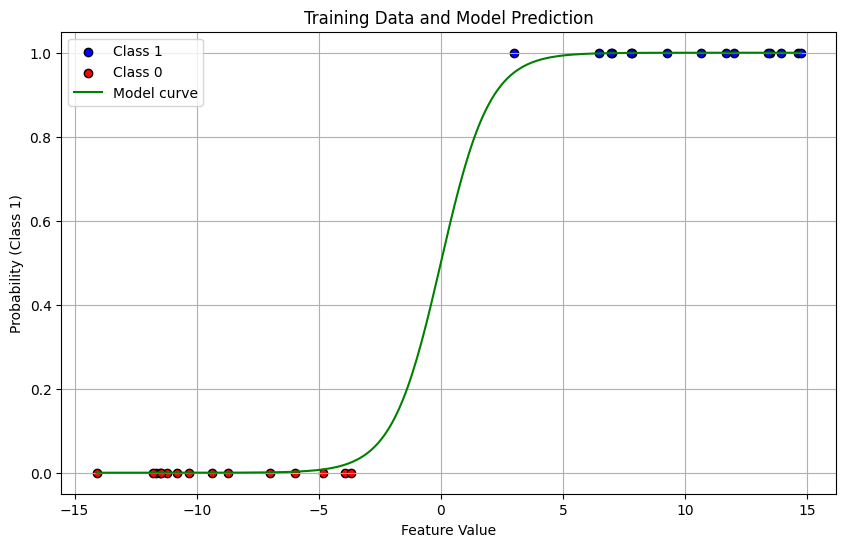

In [83]:

x_values = np.linspace(np.min(x), np.max(x), 300)

y_values = func1(w0, w1, x_values)

plt.figure(figsize=(10, 6))
plt.scatter(x[y == 1], y[y == 1], c='blue', label='Class 1', edgecolors='k')
plt.scatter(x[y == 0], y[y == 0], c='red', label='Class 0', edgecolors='k')
plt.plot(x_values, y_values, label='Model curve', color='green')
plt.title('Training Data and Model Prediction')
plt.xlabel('Feature Value')
plt.ylabel('Probability (Class 1)')
plt.legend()
plt.grid(True)
plt.show()

In [82]:
def gradient_descent(x, y, w0_init, w1_init, learning_rate, reps):
    w0, w1 = w0_init, w1_init
    loss_history = []
    for i in range(reps):
        grad_w0, grad_w1 = gradients(w0, w1, x, y)
        w0 -= learning_rate * grad_w0
        w1 -= learning_rate * grad_w1
        loss = L1(w0, w1, x, y)
        loss_history.append(loss)
        learning_rate -= 1e-6
    return w0, w1, loss_history


x = data1[0]
y = data1[1]

# # Initial parameters
# w0_init = 0.0
# w1_init = 0.0
learning_rate = 0.001
reps = 150

# Perform gradient descent
w0, w1,loss_history_4 = gradient_descent(x, y, w0_init, w1_init, learning_rate, reps)
print(f"Optimized weights: w0 = {w0}, w1 = {w1}")

Optimized weights: w0 = -3.0050339789429942e-05, w1 = 1.0026676285989038


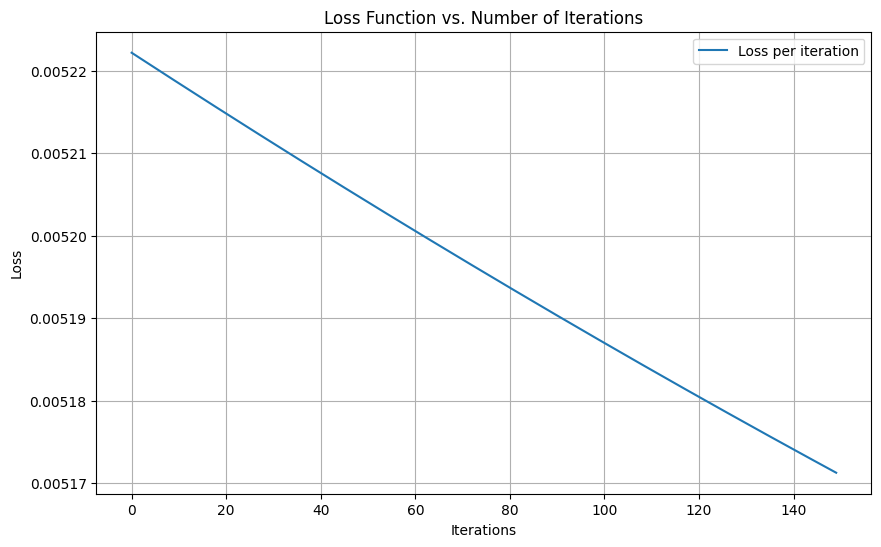

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history_4, label='Loss per iteration')
plt.title('Loss Function vs. Number of Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

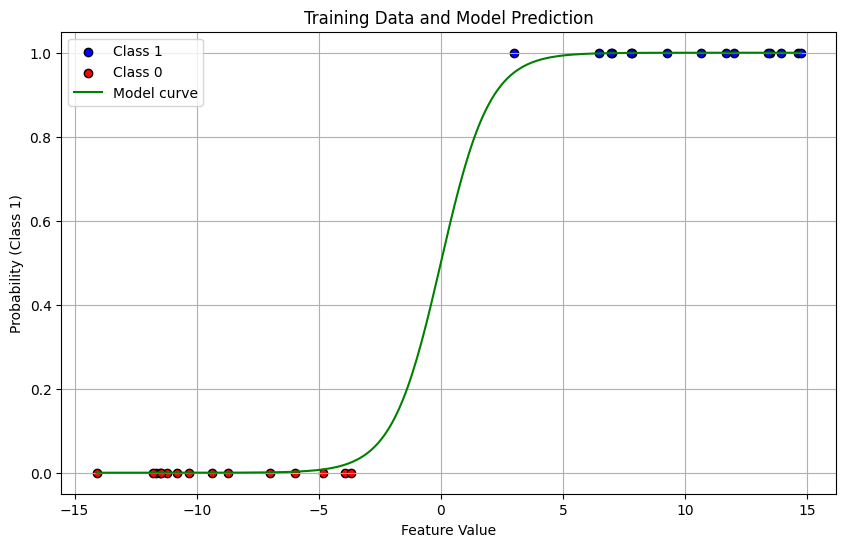

In [80]:

x_values = np.linspace(np.min(x), np.max(x), 300)

y_values = func1(w0, w1, x_values)

plt.figure(figsize=(10, 6))
plt.scatter(x[y == 1], y[y == 1], c='blue', label='Class 1', edgecolors='k')
plt.scatter(x[y == 0], y[y == 0], c='red', label='Class 0', edgecolors='k')
plt.plot(x_values, y_values, label='Model curve', color='green')
plt.title('Training Data and Model Prediction')
plt.xlabel('Feature Value')
plt.ylabel('Probability (Class 1)')
plt.legend()
plt.grid(True)
plt.show()

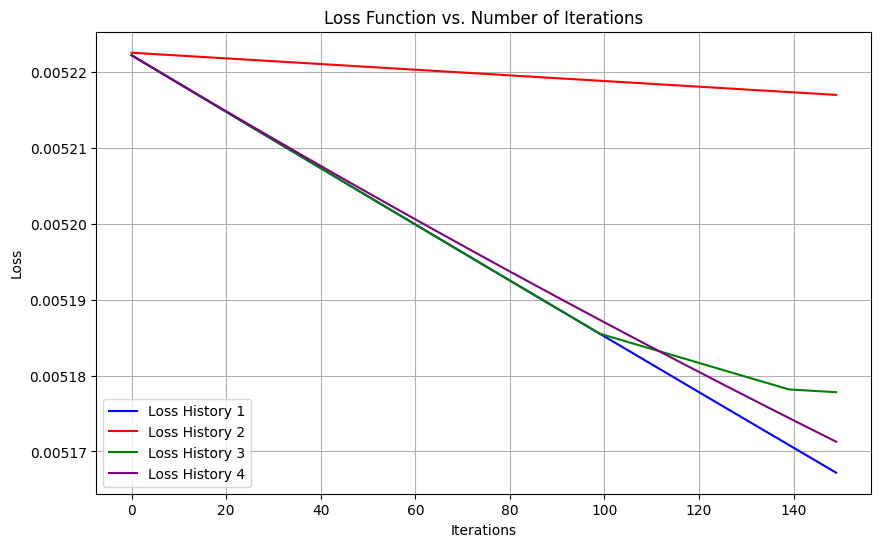

In [81]:
plt.figure(figsize=(10, 6))

plt.plot(loss_history_1, label='Loss History 1', color='blue')
plt.plot(loss_history_2, label='Loss History 2', color='red')
plt.plot(loss_history_3, label='Loss History 3', color='green')
plt.plot(loss_history_4, label='Loss History 4', color='purple')


plt.title('Loss Function vs. Number of Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')


plt.legend()
plt.grid(True)

plt.show()

Το loss history για την 1η περίπτωση λειτουργεί καλύτερα από όλες τις άλλες φορές έχει πιο απότομη μείωση ενώ  αμέσως επόμενη η 4η πρακτική είναι η 4η μέθοδος  και τα χειρότερα αποτελέσματα δίνει η 2η καθώς δεν προλαβαίνει να φτάσει στο μινιμουμ. Η 3η μέθοδος μετά στην 3η της περίπτωσης δεν έχει τόσο μείωση

#GRADIENT DESCENT 2o

In [47]:
import numpy as np
def func1(w0,w1,x):
  return 1/(1+np.exp(-(w0+w1*x)))


def L1(w0, w1, x, y):
    n = len(y)
    f1_values = func1(w0,w1,x)
    loss = -np.sum(y * np.log2(f1_values) + (1 - y) * np.log2(1 - f1_values)) / n
    return loss

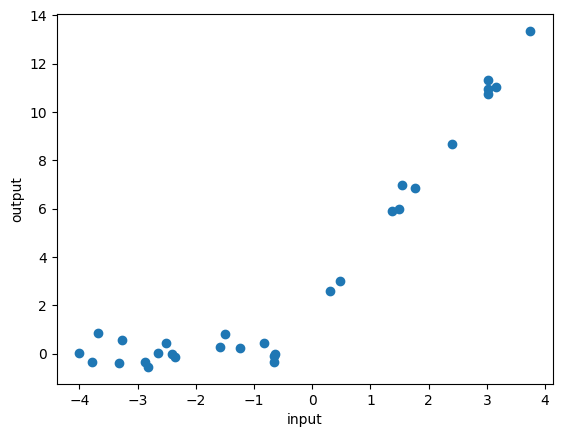

In [33]:
data2 = np.array([[-6.63823962e-01,  1.76259595e+00, -3.99908500e+00,
        -1.58133942e+00, -2.82595287e+00, -3.26129124e+00,
        -2.50991831e+00, -1.23551418e+00, -8.25860206e-01,
         3.10533872e-01, -6.46443885e-01,  1.48175600e+00,
        -2.36438200e+00,  3.02493949e+00, -3.78089925e+00,
         1.36374008e+00, -6.61561581e-01,  4.69518628e-01,
        -2.87690449e+00, -2.41518809e+00,  2.40595655e+00,
         3.74609261e+00, -1.49260657e+00,  1.53858093e+00,
         3.01111322e+00,  3.15685331e+00, -3.31964631e+00,
        -3.68756173e+00, -2.64135664e+00,  3.02514003e+00],
       [-7.76859909e-02,  6.84885863e+00,  2.11068734e-02,
         2.91407607e-01, -5.50309589e-01,  5.72361855e-01,
         4.50795360e-01,  2.51247169e-01,  4.50427975e-01,
         2.58973769e+00, -7.76767080e-04,  5.97738329e+00,
        -1.33944040e-01,  1.13399962e+01, -3.45830376e-01,
         5.89284348e+00, -3.28271093e-01,  2.98595306e+00,
        -3.35623065e-01, -6.33229946e-03,  8.65921447e+00,
         1.33554857e+01,  8.29901089e-01,  6.98676486e+00,
         1.09374219e+01,  1.10267454e+01, -3.73579147e-01,
         8.46227301e-01,  2.54038774e-02,  1.07569223e+01]])
data2_input = data2[0]
data2_output = data2[1]

plt.scatter(data2_input, data2_output)
plt.xlabel("input")
plt.ylabel("output")
plt.show()

In [35]:
import numpy as np



def sigma(x):
    return np.maximum(0, x)

def sigma_prime(x):
    return (x > 0).astype(int)

def func1(w0, w1, w2, w3, x):
    return w0 + w1 * sigma(w2 + w3 * x)

def L2(w0, w1, w2, w3, x, y):
    f1_values = func1(w0, w1, w2, w3, x)
    return np.sum((y - f1_values) ** 2) / len(y)

def gradients(w0, w1, w2, w3, x, y):
    n = len(x)
    f1 = func1(w0, w1, w2, w3, x)
    sigma_val = sigma(w2 + w3 * x)
    dL_df1 = -2 * (y - f1)

    dL_dw0 = np.sum(dL_df1) / n
    dL_dw1 = np.sum(dL_df1 * sigma_val) / n

    d_sigma = sigma_prime(w2 + w3 * x)
    dL_dw2 = np.sum(dL_df1 * w1 * d_sigma) / n
    dL_dw3 = np.sum(dL_df1 * w1 * d_sigma * x) / n

    return dL_dw0, dL_dw1, dL_dw2, dL_dw3



def gradient_descent(x, y, w0_init, w1_init,w2,w3, learning_rate, reps):

    w0, w1 = w0_init, w1_init
    loss_history = []
    for i in range(reps):
        grad_w0, grad_w1, grad_w2, grad_w3 = gradients(w0, w1,w2,w3, x, y)
        w0 -= learning_rate * grad_w0
        w1 -= learning_rate * grad_w1
        w2 -= learning_rate * grad_w2
        w3 -= learning_rate * grad_w3
        loss = L2(w0, w1,w2,w3, x, y)
        loss_history.append(loss)
        print(f"Iteration {i}, Loss: {loss}")
    return w0, w1,w2,w3, loss_history

x = data2[0]
y = data2[1]
# x = np.transpose((np.array([0.5,1.0,2.2,3.4])))
w =  np.transpose((np.array([0.5,1.0,2.2,3.4])))
w0 = w[0]  # w0 is the first element of w
w1 = w[1]  # w1 is the second element of w
w2 = w[2]
w3 = w[3]
# # Initial parameters
# w0_init = 0.0
# w1_init = 0.0
learning_rate = 0.001
reps = 150

# Perform gradient descent
w0, w1,w2,w3,loss_history1 = gradient_descent(x, y, w0, w1,w2,w3, learning_rate, reps)
print(f"Optimized weights: w0 = {w0}, w1 = {w1}")

Iteration 0, Loss: 1.30336918273071
Iteration 1, Loss: 1.1316114098183314
Iteration 2, Loss: 0.9885274362665604
Iteration 3, Loss: 0.8692239023881475
Iteration 4, Loss: 0.769666540140732
Iteration 5, Loss: 0.6865234064704288
Iteration 6, Loss: 0.617038202252043
Iteration 7, Loss: 0.5589275343209423
Iteration 8, Loss: 0.5102973240020822
Iteration 9, Loss: 0.46957459371674254
Iteration 10, Loss: 0.4354516543882148
Iteration 11, Loss: 0.4068403292398275
Iteration 12, Loss: 0.3828343273484775
Iteration 13, Loss: 0.36267825495595274
Iteration 14, Loss: 0.3457420479163059
Iteration 15, Loss: 0.3314998427222177
Iteration 16, Loss: 0.31951248990597475
Iteration 17, Loss: 0.30941306262340557
Iteration 18, Loss: 0.300894832863814
Iteration 19, Loss: 0.2937012841348032
Iteration 20, Loss: 0.28761780742469484
Iteration 21, Loss: 0.2824647904780573
Iteration 22, Loss: 0.2780918618608687
Iteration 23, Loss: 0.2743730932521079
Iteration 24, Loss: 0.27120299770960743
Iteration 25, Loss: 0.268493189777

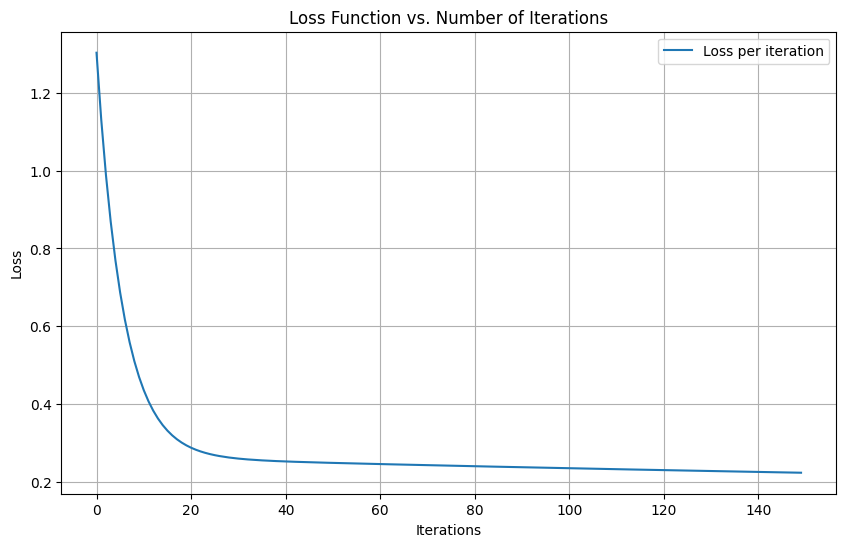

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history1, label='Loss per iteration')
plt.title('Loss Function vs. Number of Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

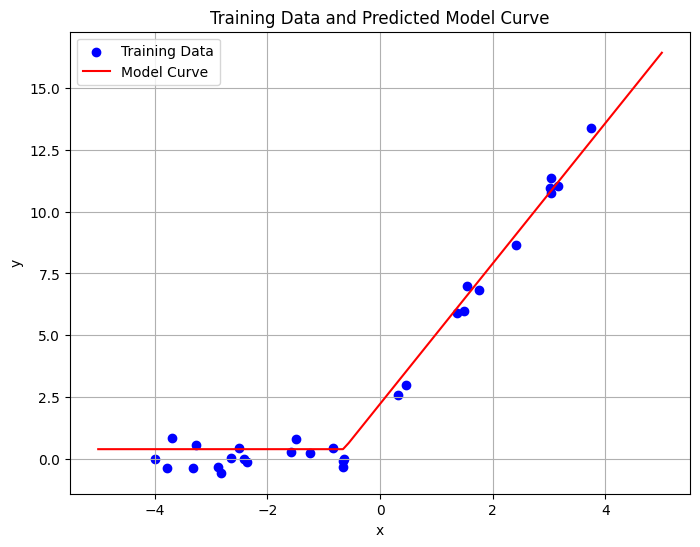

In [39]:
def model_curve(x):
    return func1(w0, w1, w2, w3, x)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Training Data')
x_values = np.linspace(-5, 5, 100)
plt.plot(x_values, model_curve(x_values), color='red', label='Model Curve')
plt.title('Training Data and Predicted Model Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Iteration 0, Loss: 0.22003698336090027
Iteration 1, Loss: 0.22001573461657564
Iteration 2, Loss: 0.21999449135970875
Iteration 3, Loss: 0.21997325358887515
Iteration 4, Loss: 0.21995202130264907
Iteration 5, Loss: 0.21993079449960654
Iteration 6, Loss: 0.21990957317832305
Iteration 7, Loss: 0.21988835733737508
Iteration 8, Loss: 0.21986714697533885
Iteration 9, Loss: 0.21984594209079178
Iteration 10, Loss: 0.21982474268231078
Iteration 11, Loss: 0.21980354874847363
Iteration 12, Loss: 0.21978236028785844
Iteration 13, Loss: 0.2197611772990435
Iteration 14, Loss: 0.21973999978060793
Iteration 15, Loss: 0.21971882773113066
Iteration 16, Loss: 0.2196976611491911
Iteration 17, Loss: 0.2196765000333691
Iteration 18, Loss: 0.2196553443822454
Iteration 19, Loss: 0.21963419419440008
Iteration 20, Loss: 0.2196130494684145
Iteration 21, Loss: 0.21959191020286992
Iteration 22, Loss: 0.21957077639634812
Iteration 23, Loss: 0.21954964804743096
Iteration 24, Loss: 0.219528525154701
Iteration 25, Los

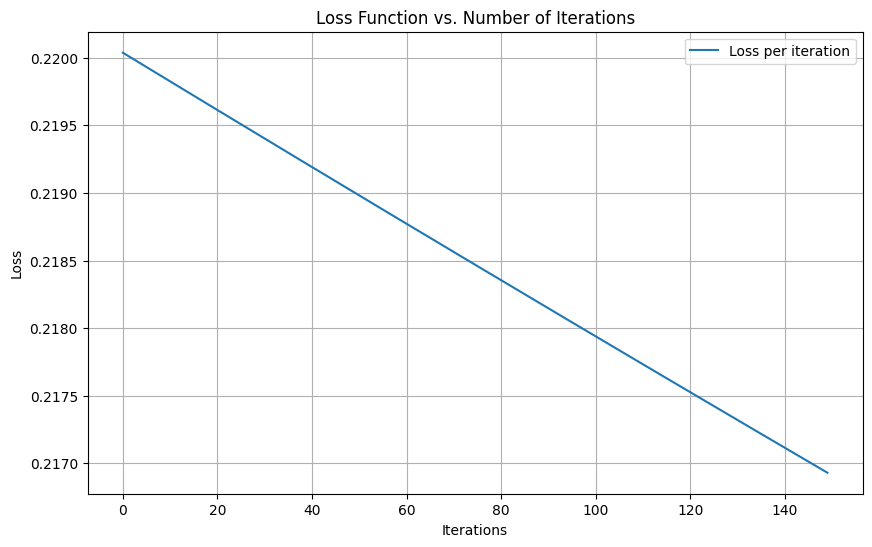

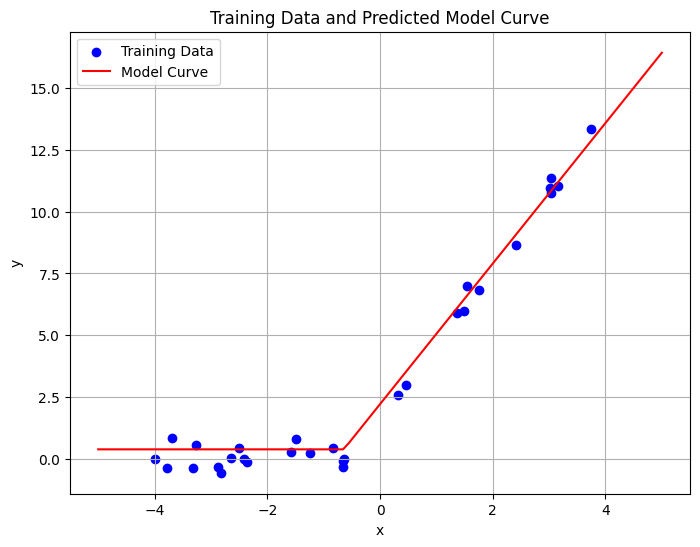

In [40]:
learning_rate = 0.0001
reps = 150


w0, w1,w2,w3,loss_history2 = gradient_descent(x, y, w0, w1,w2,w3, learning_rate, reps)
print(f"Optimized weights: w0 = {w0}, w1 = {w1}")
plt.figure(figsize=(10, 6))
plt.plot(loss_history2, label='Loss per iteration')
plt.title('Loss Function vs. Number of Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Training Data')
x_values = np.linspace(-5, 5, 100)
plt.plot(x_values, model_curve(x_values), color='red', label='Model Curve')
plt.title('Training Data and Predicted Model Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Iteration 0, Loss: 0.2167263148614237
Iteration 1, Loss: 0.21652249465024362
Iteration 2, Loss: 0.21631920036567295
Iteration 3, Loss: 0.21611643064243818
Iteration 4, Loss: 0.21591418411880553
Iteration 5, Loss: 0.21571245943657308
Iteration 6, Loss: 0.21551125524106077
Iteration 7, Loss: 0.21531057018110158
Iteration 8, Loss: 0.21511040290903233
Iteration 9, Loss: 0.214910752080685
Iteration 10, Loss: 0.21471161635537694
Iteration 11, Loss: 0.2145129943959023
Iteration 12, Loss: 0.21431488486852332
Iteration 13, Loss: 0.21411728644296107
Iteration 14, Loss: 0.213920197792386
Iteration 15, Loss: 0.21372361759340996
Iteration 16, Loss: 0.21352754452607675
Iteration 17, Loss: 0.21333197727385314
Iteration 18, Loss: 0.21313691452362005
Iteration 19, Loss: 0.21294235496566447
Iteration 20, Loss: 0.21274829729366948
Iteration 21, Loss: 0.21255474020470613
Iteration 22, Loss: 0.21236168239922498
Iteration 23, Loss: 0.21216912258104606
Iteration 24, Loss: 0.2119770594573517
Iteration 25, Los

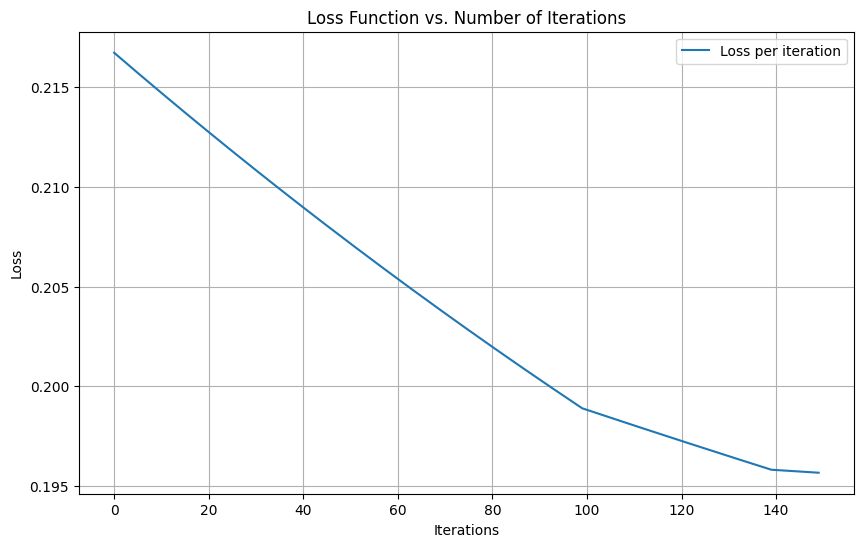

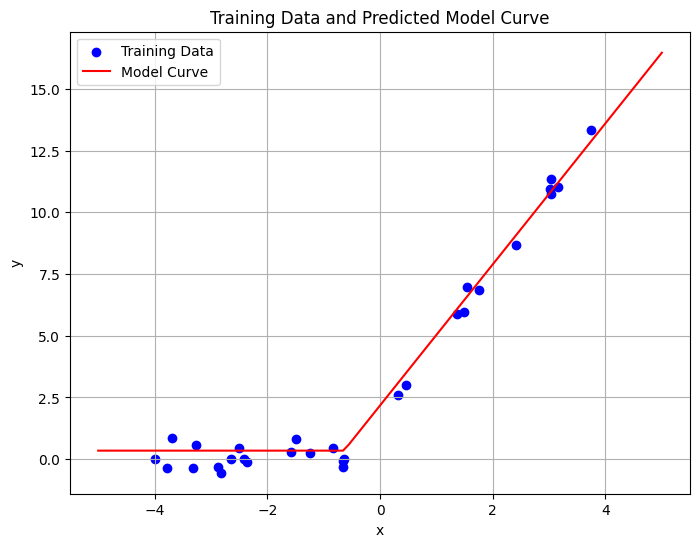

In [41]:
def gradient_descent(x, y, w0_init, w1_init,w2,w3, learning_rate, reps):
    w0, w1 = w0_init, w1_init
    loss_history = []
    for i in range(reps):
        if i>=100 and i<=139:
          learning_rate = 5*0.0001
        if i >= 140:
          learning_rate = 0.0001
        grad_w0, grad_w1, grad_w2, grad_w3 = gradients(w0, w1,w2,w3, x, y)
        w0 -= learning_rate * grad_w0
        w1 -= learning_rate * grad_w1
        w2 -= learning_rate * grad_w2
        w3 -= learning_rate * grad_w3
        loss = L2(w0, w1,w2,w3, x, y)
        loss_history.append(loss)
    return w0, w1,w2,w3, loss_history


learning_rate = 0.001
reps = 150


w0, w1,w2,w3,loss_history3 = gradient_descent(x, y, w0, w1,w2,w3, learning_rate, reps)
print(f"Optimized weights: w0 = {w0}, w1 = {w1}")
plt.figure(figsize=(10, 6))
plt.plot(loss_history3, label='Loss per iteration')
plt.title('Loss Function vs. Number of Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Training Data')
x_values = np.linspace(-5, 5, 100)
plt.plot(x_values, model_curve(x_values), color='red', label='Model Curve')
plt.title('Training Data and Predicted Model Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Iteration 0, Loss: 0.1955185172668138
Iteration 1, Loss: 0.19536951483327608
Iteration 2, Loss: 0.19522104429509646
Iteration 3, Loss: 0.19507310351203763
Iteration 4, Loss: 0.19492569035352533
Iteration 5, Loss: 0.1947788026986005
Iteration 6, Loss: 0.1946324384358739
Iteration 7, Loss: 0.19448659546347763
Iteration 8, Loss: 0.1943412716890198
Iteration 9, Loss: 0.19419646502953836
Iteration 10, Loss: 0.194052173411455
Iteration 11, Loss: 0.19390839477052946
Iteration 12, Loss: 0.19376512705181365
Iteration 13, Loss: 0.19362236820960746
Iteration 14, Loss: 0.19348011620741318
Iteration 15, Loss: 0.19333836901789045
Iteration 16, Loss: 0.19319712462281233
Iteration 17, Loss: 0.19305638101302117
Iteration 18, Loss: 0.19291613618838366
Iteration 19, Loss: 0.19277638815774795
Iteration 20, Loss: 0.19263713493889983
Iteration 21, Loss: 0.1924983745585189
Iteration 22, Loss: 0.1923601050521359
Iteration 23, Loss: 0.19222232446409024
Iteration 24, Loss: 0.19208503084748627
Iteration 25, Loss

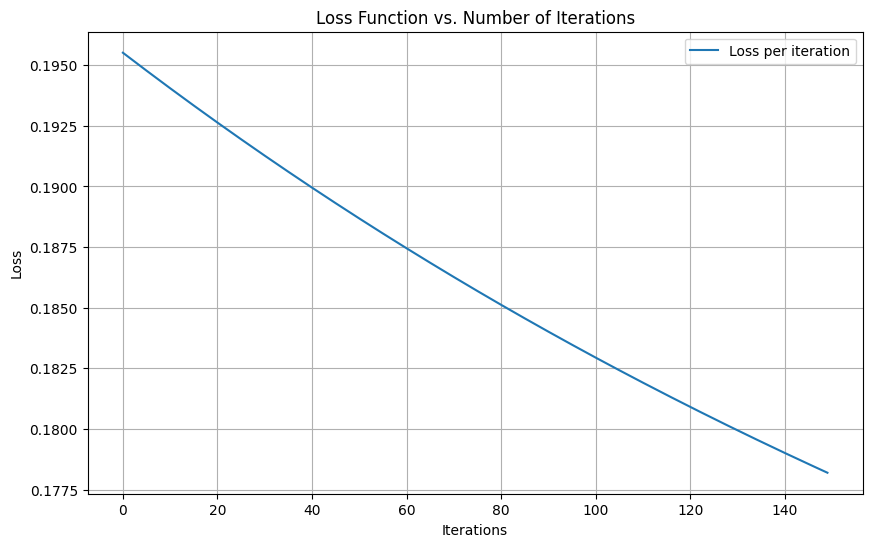

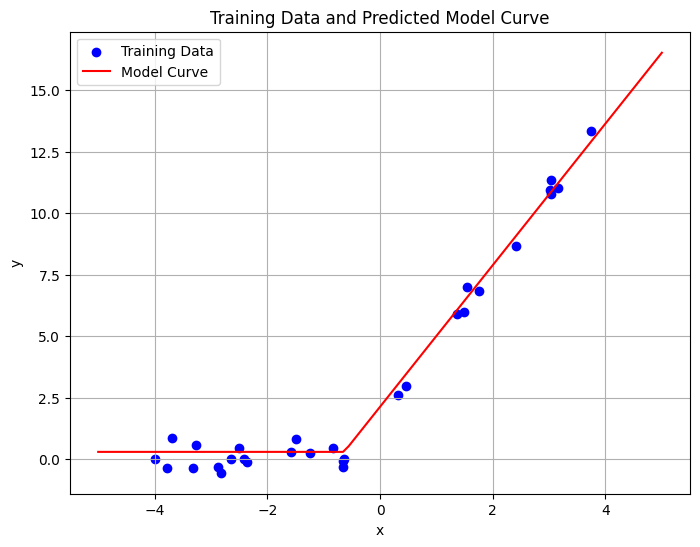

In [42]:
def gradient_descent(x, y, w0_init, w1_init,w2,w3, learning_rate, reps):
    w0, w1 = w0_init, w1_init
    loss_history = []
    for i in range(reps):
        grad_w0, grad_w1, grad_w2, grad_w3 = gradients(w0, w1,w2,w3, x, y)
        w0 -= learning_rate * grad_w0
        w1 -= learning_rate * grad_w1
        w2 -= learning_rate * grad_w2
        w3 -= learning_rate * grad_w3
        loss = L2(w0, w1,w2,w3, x, y)
        loss_history.append(loss)
        print(f"Iteration {i}, Loss: {loss}")
        learning_rate -= 1e-6
    return w0, w1,w2,w3, loss_history


learning_rate = 0.001
reps = 150


w0, w1,w2,w3,loss_history4 = gradient_descent(x, y, w0, w1,w2,w3, learning_rate, reps)
print(f"Optimized weights: w0 = {w0}, w1 = {w1}")
plt.figure(figsize=(10, 6))
plt.plot(loss_history4, label='Loss per iteration')
plt.title('Loss Function vs. Number of Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Training Data')
x_values = np.linspace(-5, 5, 100)
plt.plot(x_values, model_curve(x_values), color='red', label='Model Curve')
plt.title('Training Data and Predicted Model Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

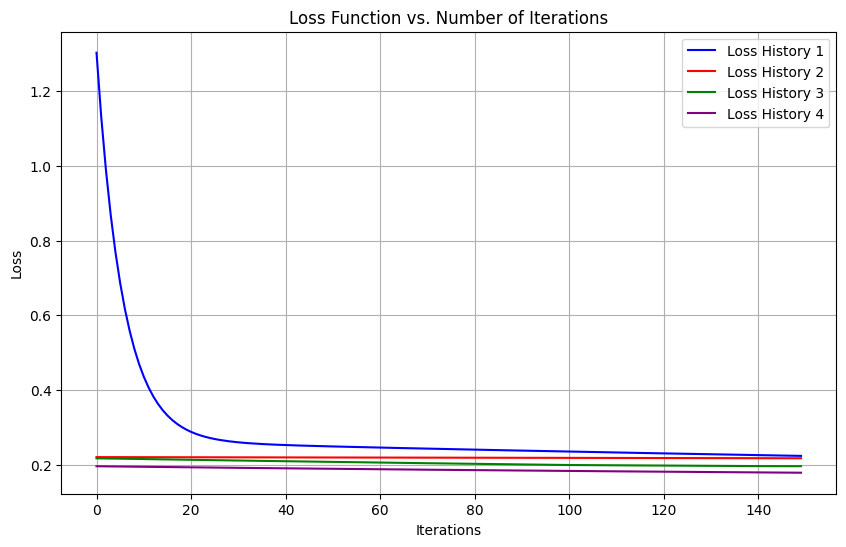

In [43]:
plt.figure(figsize=(10, 6))


plt.plot(loss_history1, label='Loss History 1', color='blue')
plt.plot(loss_history2, label='Loss History 2', color='red')
plt.plot(loss_history3, label='Loss History 3', color='green')
plt.plot(loss_history4, label='Loss History 4', color='purple')


plt.title('Loss Function vs. Number of Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.legend()
plt.grid(True)


plt.show()

Στην 1η περίπτωση δεν μειώνεται γραμμικά το Loss αν και φτάνει περίπου τις άλλες καμπύλες και διαφοροποιείται από την 1η μέθοδο με τις διαφορετικές L1 και f ενώ οι άλλες μειώνονται πιο σταθερά και γραμμικά ωστόσο η 2η μέθοδος L2 F2 έχει καλύτερη απόδοση από το L1 F1

#Ερώτημα 3.1

In [13]:

import os
import numpy as np
from PIL import Image


def func(image):
    img_array = np.array(image)
    mean = np.mean(img_array)
    std = np.std(img_array)

    return mean, std

def normalize(image, mean, std):

    img_array = np.array(image)
    normalized_image = (img_array - mean) / std

    return normalized_image


def func_1(path):
  Set_1 = []
  Set_2 = []
  Set_3 = []
  Set_4 = []
  Set_5 = []
  for filename in os.listdir(path):
    s = filename.split("_")[1]
    s = s.split(".")[0]
    number = int(s)
    if((number >= 1) and (number <= 7)):
      Set_1.append(filename)
    elif((number >= 8) and (number <= 19)):
      Set_2.append(filename)
    elif((number >= 20) and (number <= 31)):
      Set_3.append(filename)
    elif((number >= 32) and (number <= 45)):
      Set_4.append(filename)
    elif((number >= 46) and (number <= 64)):
      Set_5.append(filename)

  return Set_1,Set_2,Set_3,Set_4,Set_5

def loadImages(path,set_number):
  photos = []
  labels = []
  Set_1,Set_2,Set_3,Set_4,Set_5 = func_1(path)
  if(set_number == "Set_1"):
    setnumber = Set_1
  if(set_number == "Set_2"):
    setnumber = Set_2
  if(set_number == "Set_3"):
    setnumber = Set_3
  if(set_number == "Set_4"):
    setnumber = Set_4
  if(set_number == "Set_5"):
    setnumber = Set_5

  for filename in os.listdir(path):
    if(filename in setnumber):
      fullpath = os.path.join(path,filename)
      photo = Image.open(fullpath)
      person = filename.split("_")[0]
      label = person.split("n")[1]
      category = int(label)
      labels.append(category)
      mean, std = func(photo)
      normalized_image = normalize(photo, mean, std)
      photo = normalized_image
      photo = np.resize(photo,(1,2500))
      photo.reshape(-1)
      photo = photo.flatten()
      photos.append(photo)

  return photos,labels


sets,labels = loadImages("/content/drive/MyDrive/faces","Set_1");
sets2,labels2 = loadImages("/content/drive/MyDrive/faces","Set_2");
sets3,labels3 = loadImages("/content/drive/MyDrive/faces","Set_3");
sets4,labels4 = loadImages("/content/drive/MyDrive/faces","Set_4");
sets5,labels5 = loadImages("/content/drive/MyDrive/faces","Set_5");


In [14]:
sets_array = np.array(sets)


print(sets_array.shape)

(70, 2500)


In [15]:
X = np.column_stack(sets_array)
X = sets_array
X.shape

(70, 2500)

[-1.37310103 -1.37046645 -1.31808406 ... -0.74884951 -1.00645208
 -1.17691149]
Shape of X: (70, 2500)
Shape of transformed X: (70, 30)
Shape of transformed test X: (70, 30)
Shape of reconstructed X: (70, 2500)


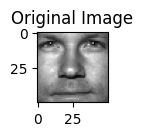

In [16]:
import numpy as np
import matplotlib.pyplot as plt

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X - self.mean


        cov = np.cov(X, rowvar=False)

        eigenvalues, eigenvectors = np.linalg.eig(cov)


        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[:, idxs]

        self.components = eigenvectors[:, :self.n_components]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components)
    def reconstruct(self, X):
        # projects data back to original space
        X_projected = self.transform(X)
        return np.dot(X_projected, self.components.T) + self.mean


if __name__ == "__main__":
    pca = PCA(30)
    pca.fit(X)
    X_projected = pca.transform(X)

    print("Shape of X:", X.shape)
    print("Shape of transformed X:", X_projected.shape)
    X_test = pca.transform(X)
    print("Shape of transformed test X:", X_test.shape)

    X_reconstructed = pca.reconstruct(X)
    print("Shape of reconstructed X:", X_reconstructed.shape)
    original_image = X[0].reshape(50, 50)
    reconstructed_image = np.real(X_reconstructed[0]).reshape(50, 50)

    plt.figure(figsize=(2, 2))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_image, cmap='gray')



#Ερώτημα 3.2

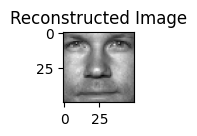

In [17]:
plt.figure(figsize=(2, 2))
plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image, cmap='gray')
plt.show()


In [ ]:
# pca = PCA(30)
# pca.fit(X)
# X_projected = pca.transform(X)

# print("Shape of X:", X.shape)
# print("Shape of transformed X:", X_projected.shape)
# X_test = pca.transform(X)
# print("Shape of transformed test X:", X_test.shape)

In [18]:
sets_array = np.array(X_projected)
print(sets_array.shape)

sets_array = np.array(labels)
print(sets_array.shape)

(70, 30)
(70,)


In [19]:

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


knn = KNeighborsClassifier(n_neighbors=1)
real_x = np.real(X_projected)
knn.fit(real_x, labels)
y_pred = knn.predict(np.real(X_test))

accuracy = accuracy_score(labels, y_pred)
print("Accuracy of k-NN classifier:", accuracy)



Accuracy of k-NN classifier: 1.0


In [20]:
import random
random_dimensions = [random.randint(2, 70) for _ in range(10)]
random_dimensions.sort()


In [21]:
random_dimensions[9] = 170
random_dimensions[8] = 110
random_dimensions[7] = 100
random_dimensions[0] = 2
random_dimensions[1] = 8
random_dimensions[2] = 19
random_dimensions

[2, 8, 19, 19, 23, 27, 66, 100, 110, 170]

# 3.3

d is  2
[-1.37310103 -1.37046645 -1.31808406 ... -0.74884951 -1.00645208
 -1.17691149]


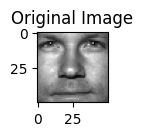

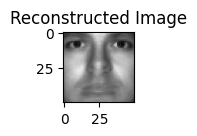

d is  8
[-1.37310103 -1.37046645 -1.31808406 ... -0.74884951 -1.00645208
 -1.17691149]


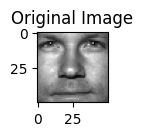

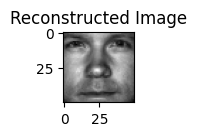

d is  19
[-1.37310103 -1.37046645 -1.31808406 ... -0.74884951 -1.00645208
 -1.17691149]


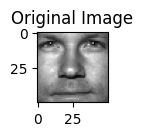

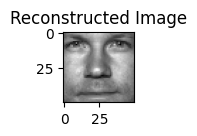

d is  19
[-1.37310103 -1.37046645 -1.31808406 ... -0.74884951 -1.00645208
 -1.17691149]


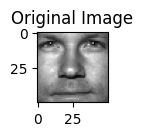

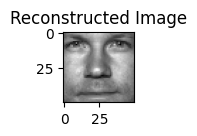

d is  23
[-1.37310103 -1.37046645 -1.31808406 ... -0.74884951 -1.00645208
 -1.17691149]


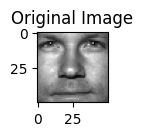

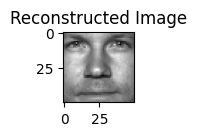

d is  27
[-1.37310103 -1.37046645 -1.31808406 ... -0.74884951 -1.00645208
 -1.17691149]


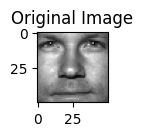

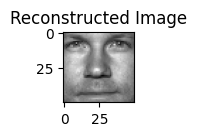

d is  66
[-1.37310103 -1.37046645 -1.31808406 ... -0.74884951 -1.00645208
 -1.17691149]


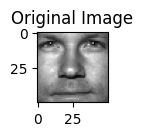

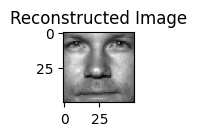

d is  100
[-1.37310103 -1.37046645 -1.31808406 ... -0.74884951 -1.00645208
 -1.17691149]


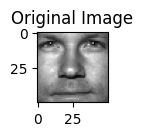

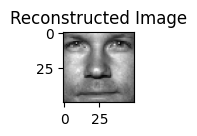

d is  110
[-1.37310103 -1.37046645 -1.31808406 ... -0.74884951 -1.00645208
 -1.17691149]


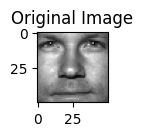

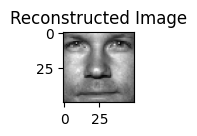

d is  170
[-1.37310103 -1.37046645 -1.31808406 ... -0.74884951 -1.00645208
 -1.17691149]


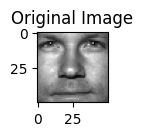

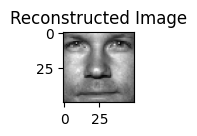

In [22]:


errors = []
pcas = []
results = []
for d in random_dimensions:
    print("d is ",d)
    pca = PCA(d)
    pca.fit(X)
    X_projected = pca.transform(X)
    X_reconstructed = pca.reconstruct(X)
    results.append({
        "original_shape": X.shape,
        "projected_shape": X_projected.shape,
        "reconstructed_shape": X_reconstructed.shape,
        "dimension": d
    })

    pcas.append(pca)

    original_image = X[0].reshape(50, 50)
    reconstructed_image = np.real(X_reconstructed[0]).reshape(50, 50)

    plt.figure(figsize=(2, 2))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_image, cmap='gray')
    plt.figure(figsize=(2, 2))
    plt.subplot(1, 2, 2)
    plt.title("Reconstructed Image")
    plt.imshow(reconstructed_image, cmap='gray')
    plt.show()
    mse = np.mean(np.square(np.real(X) - np.real(X_reconstructed)), axis=1)
    mean_mse = np.mean(mse)
    errors.append(mean_mse)


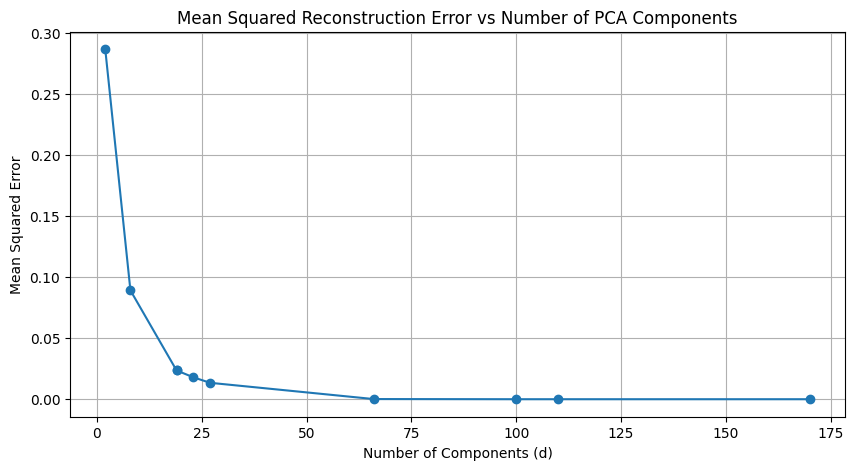

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(random_dimensions, errors, marker='o')
plt.title('Mean Squared Reconstruction Error vs Number of PCA Components')
plt.xlabel('Number of Components (d)')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

Παρατηρώ ότι για χαμηλά d το μέσο λάθος είναι πολύ μεγάλο και όσο αυξάνεται το d μειώνεται αλλά για d>=70 η βελτίωση σταματάει και παραμένει περίπου σταθερό

Shape of X: (70, 2500)
Shape of transformed X: (70, 30)
Shape of transformed test X: (70, 30)
Shape of reconstructed X: (70, 2500)


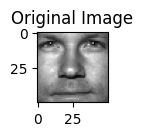

In [9]:
if __name__ == "__main__":

    pca = PCA(30)
    pca.fit(X)
    X_projected = pca.transform(X)

    print("Shape of X:", X.shape)
    print("Shape of transformed X:", X_projected.shape)
    X_test = pca.transform(X)
    print("Shape of transformed test X:", X_test.shape)

    X_reconstructed = pca.reconstruct(X)
    print("Shape of reconstructed X:", X_reconstructed.shape)

    original_image = X[0].reshape(50, 50)
    reconstructed_image = np.real(X_reconstructed[0]).reshape(50, 50)

    plt.figure(figsize=(2, 2))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_image, cmap='gray')

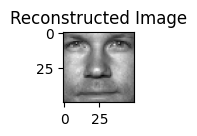

In [12]:
plt.figure(figsize=(2, 2))
plt.subplot(1, 2, 1)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image, cmap='gray')
plt.show()

#Ερώτημα 3.4
κάθε ιδιοδιάνυσμα αποτελεί μια συνιστώσα ενός πολυδιάστατου χώρου, όπου κάθε διάσταση αντιπροσωπεύει συγκεκριμένες παραλλαγές στα χαρακτηριστικά των προσώπων που εντοπίζονται στις εικόνες. Κάποια απέχουν πολύ από το αρχικό

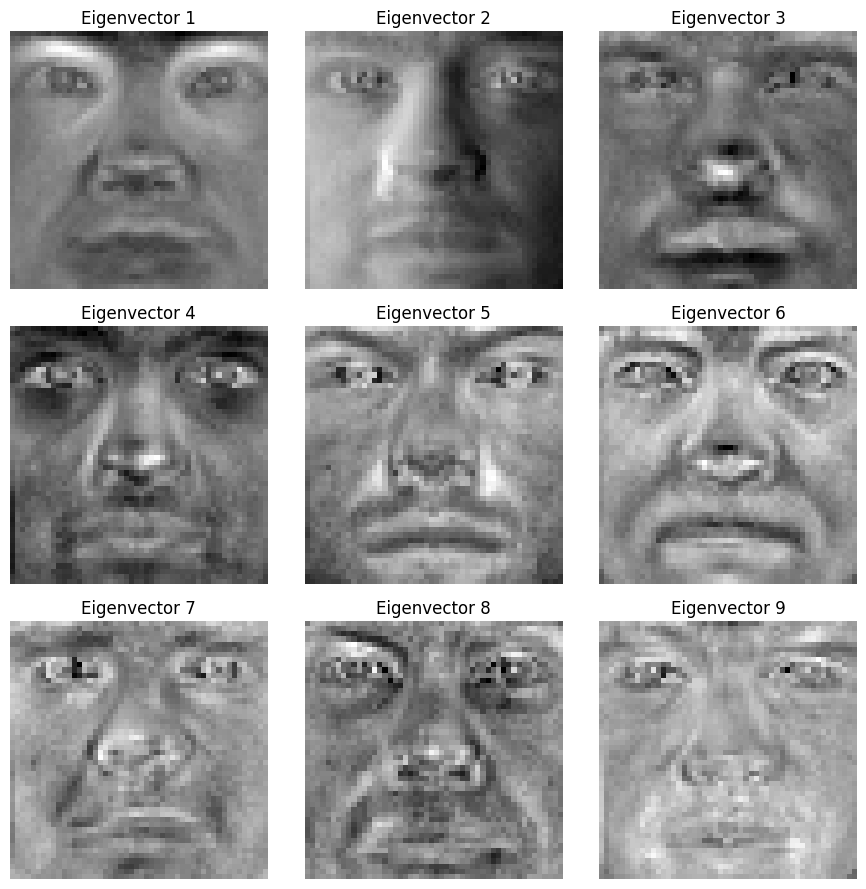

(2500, 170)

In [27]:
fig, axes = plt.subplots(3, 3, figsize=(9,9))
for i, ax in enumerate(axes.flatten()):
    if i < 9:
        ax.imshow(np.real(pca.components[:, i]).reshape(50, 50), cmap='gray')
        ax.set_title(f"Eigenvector {i+1}")
        ax.axis('off')

plt.tight_layout()
plt.show()

pca.components.shape

#Ερώτημα 3.5

In [31]:
X = np.array(sets)
for d in random_dimensions:
    print("d is ",d)
    pca = PCA(d)
    pca.fit(X)
    X_projected = pca.transform(X)
    set2_9 = pca.transform(np.array(sets2))
    set3_9 = pca.transform(np.array(sets3))
    set4_9 = pca.transform(np.array(sets4))
    set5_9 = pca.transform(np.array(sets5))
    knn = KNeighborsClassifier(n_neighbors=1)
    real_x = np.real(X_projected)
    knn.fit(real_x, labels)

    set2_pred = knn.predict(np.real(set2_9))
    print (d,"Accuracy in set 2: ", accuracy_score(labels2,set2_pred))

    set3_pred = knn.predict(np.real(set3_9))
    print (d,"Accuracy in set 3: ", accuracy_score(labels3,set3_pred))

    set4_pred = knn.predict(np.real(set4_9))
    print (d,"Accuracy in set 4 :", accuracy_score(labels4,set4_pred))

    set5_pred = knn.predict(np.real(set5_9))
    print (d,"Accuracy in set 5 :", accuracy_score(labels5,set5_pred ))
    # y_pred = knn.predict(np.real(sets2))
    # accuracy = accuracy_score(labels2, y_pred)
    # print("Accuracy of k-NN classifier2:", accuracy, d )

    # y_pred = knn.predict(np.real(sets3))
    # accuracy = accuracy_score(labels3, y_pred)
    # print("Accuracy of k-NN classifier3:", accuracy,d)

    # y_pred = knn.predict(np.real(sets4))
    # accuracy = accuracy_score(labels4, y_pred)
    # print("Accuracy of k-NN classifier4:", accuracy,d)

    # y_pred = knn.predict(np.real(sets5))
    # accuracy = accuracy_score(labels5, y_pred)
    # print("Accuracy of k-NN classifier5:", accuracy,d)


d is  2
2 Accuracy in set 2:  0.4083333333333333
2 Accuracy in set 3:  0.175
2 Accuracy in set 4 : 0.1357142857142857
2 Accuracy in set 5 : 0.07894736842105263
d is  8
8 Accuracy in set 2:  0.9916666666666667
8 Accuracy in set 3:  0.7
8 Accuracy in set 4 : 0.3
8 Accuracy in set 5 : 0.14210526315789473
d is  19
19 Accuracy in set 2:  1.0
19 Accuracy in set 3:  0.95
19 Accuracy in set 4 : 0.4142857142857143
19 Accuracy in set 5 : 0.19473684210526315
d is  32
32 Accuracy in set 2:  1.0
32 Accuracy in set 3:  0.95
32 Accuracy in set 4 : 0.45
32 Accuracy in set 5 : 0.21052631578947367
d is  38
38 Accuracy in set 2:  1.0
38 Accuracy in set 3:  0.9583333333333334
38 Accuracy in set 4 : 0.45714285714285713
38 Accuracy in set 5 : 0.23684210526315788
d is  43
43 Accuracy in set 2:  1.0
43 Accuracy in set 3:  0.9583333333333334
43 Accuracy in set 4 : 0.4714285714285714
43 Accuracy in set 5 : 0.24210526315789474
d is  63
63 Accuracy in set 2:  1.0
63 Accuracy in set 3:  0.9583333333333334
63 Accur

Το set2 είναι το πιο σταθερό και για το d = 63 έχω την καλύτερη απόδοση μέχρι το 63 αυξάνει η απόδοση ύστερα πέφτει καθώς αυξάνεται το d και μετά μάλλον προστίθεται noise και redudancy και όχι χρήξσιμη πληροφορία για αυτό πέφτει το accuracy

#Ερώτημα 3.6

In [28]:
d = 63

[-1.37310103 -1.37046645 -1.31808406 ... -0.74884951 -1.00645208
 -1.17691149]


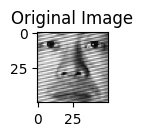

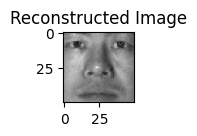

In [29]:
pca = PCA(d)
X = np.array(sets)
pca.fit(X)
X_projected = pca.transform(X)
set2_9 = pca.transform(np.array(sets2))
X_reconstructed = pca.reconstruct(sets2)
original_image = np.array(sets2)[0].reshape(50, 50)  # Assuming each image is 50x50 pixels
reconstructed_image = np.real(X_reconstructed[0]).reshape(50, 50)

plt.figure(figsize=(2, 2))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')
plt.figure(figsize=(2, 2))
plt.subplot(1, 2, 1)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image, cmap='gray')
plt.show()
# Collect shapes for output
# results.append({
#     "original_shape": X.shape,
#     "projected_shape": X_projected.shape,
#     "reconstructed_shape": X_reconstructed.shape,
#     "dimension": d
# })
# set2_9 = pca.transform(np.array(sets2))
# set3_9 = pca.transform(np.array(sets3))
# set4_9 = pca.transform(np.array(sets4))
# set5_9 = pca.transform(np.array(sets5))

Η ποιότητα ανακατασκευής είναι σχετικά κοντά έχει πετύχει τα κύρια χαρακτηριστικά εκτός από τις σκιάσεις

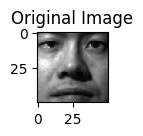

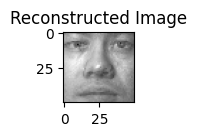

In [30]:
X_reconstructed = pca.reconstruct(sets3)
original_image = np.array(sets3)[0].reshape(50, 50)
reconstructed_image = np.real(X_reconstructed[0]).reshape(50, 50)

plt.figure(figsize=(2, 2))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')
plt.figure(figsize=(2, 2))
plt.subplot(1, 2, 1)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image, cmap='gray')
plt.show()

Η ποιότητα ανακατασκεύης δεν είναι όσο καλή όσο στο set2 αλλά σχετικά καλή

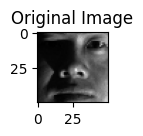

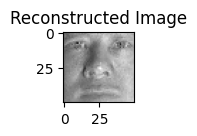

In [31]:
X_reconstructed = pca.reconstruct(sets4)
original_image = np.array(sets4)[0].reshape(50, 50)
reconstructed_image = np.real(X_reconstructed[0]).reshape(50, 50)

plt.figure(figsize=(2, 2))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')
plt.figure(figsize=(2, 2))
plt.subplot(1, 2, 1)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image, cmap='gray')
plt.show()

Η ποιότητα ανακατασκευής είναι μέτρια προς κακή

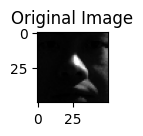

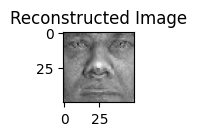

In [39]:
X_reconstructed = pca.reconstruct(sets5)
original_image = np.array(sets5)[0].reshape(50, 50)  # Assuming each image is 50x50 pixels
reconstructed_image = np.real(X_reconstructed[0]).reshape(50, 50)

plt.figure(figsize=(2, 2))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')
plt.figure(figsize=(2, 2))
plt.subplot(1, 2, 1)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image, cmap='gray')
plt.show()

#Ερώτημα 3.7

(70, 2500)
(2500, 70)


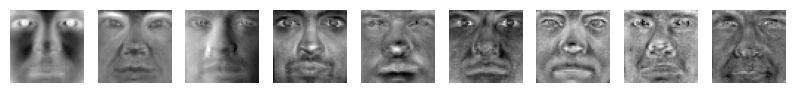

In [49]:
from sklearn import preprocessing as p
svd = np.array(sets)
A =svd
print(A.shape)
min_max_scaler = p.MinMaxScaler()
svd_set = min_max_scaler.fit_transform(A.T)
print(svd_set.shape)
U, s, V = np.linalg.svd(svd_set, full_matrices=False)
U = U.T

plt.figure(figsize=(10, 1))



for i in range(9):
    vector = U[i, :]
    img = vector.reshape([50,50])
    plt.subplot(1, 9, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

Οι περισσότερες εικόνες είναι παρόμοιες και σε αυτές που υπάρχουν εμφανείς διαφορές έγκεινται στην φωτεινότητα η οποία φαίνεται να είναι ανεστραμμένη. Περιμέναμε να έχουμε τα ίδια ιδιοδιανύσματα αφού το PCA είναι "ειδική" περίπτωση του SVD αφού ο πίνακας συνδιακύμανσης γράφεται στην μορφή πινάκων που επιστρέφει ο SVD και έπειτα αρκεί να πάρουμε τις πρώτες στήλες από τον U (επειδή έχουμε δεδομένα σε στήλες) σαν τα n_components.